In [86]:
import numpy as np 
import matplotlib.pyplot as plt
from sympy import *

import math


In [87]:
from tqdm import tqdm

In [88]:
#################
# initialisation of values
signal_temp=np.loadtxt('./signal.dat', usecols=(1))
events=np.loadtxt('./data1703.dat', usecols=0,skiprows=1)
bkg=np.loadtxt('./data1703.dat', usecols=1,skiprows=1)
event=np.loadtxt('./data1703.dat', dtype=int, usecols=0,skiprows=1)
bin_size=np.loadtxt('./data1703.dat', usecols=3,skiprows=1)
bkg_err=np.loadtxt('./data1703.dat', usecols=4,skiprows=1)
signal=np.array([152.898, 110.269, 82.4174,  83.5542 , 61.3867,  64.2287,  48.3136,  31.2618 , 25.5778 , 16.4835
, 21.0306 , 14.7783 , 11.3679  ,10.2311 ,  2.84198,  2.27358 , 1.70519 , 3.97877,
  0.    ,   2.84198,  1.70519 , 4.54717])




In [89]:
signal

array([152.898  , 110.269  ,  82.4174 ,  83.5542 ,  61.3867 ,  64.2287 ,
        48.3136 ,  31.2618 ,  25.5778 ,  16.4835 ,  21.0306 ,  14.7783 ,
        11.3679 ,  10.2311 ,   2.84198,   2.27358,   1.70519,   3.97877,
         0.     ,   2.84198,   1.70519,   4.54717])

In [90]:
a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v=symbols('theta_1 theta_2 theta_3 theta_4 theta_5 theta_6 theta_7 theta_8 theta_9 theta_10 theta_11 theta_12 theta_13 theta_14 theta_15 theta_16 theta_17 theta_18 theta_19 theta_20 theta_21 theta_22')


In [91]:
theta=Matrix([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v])

In [92]:
#######Initialising matrix########

corr_mat=np.loadtxt('./correlation_MONOJ.dat',usecols=range(22))
corr_mat=np.flipud(corr_mat)


#########Getting covariance matirx from correlation matrix############

std_dev_mat=np.diag(bkg_err)

covar_mat_temp=np.matmul(std_dev_mat,corr_mat)
covar_mat=np.matmul(covar_mat_temp,std_dev_mat)
print(covar_mat)

covar_mat=Matrix(covar_mat)
covar_mat_inv=covar_mat**(-1)

[[ 1.60000e+07  8.18400e+06  4.04800e+06  2.19240e+06  1.31200e+06
   1.07520e+06  6.08000e+05  3.55200e+05  2.11720e+05  1.17120e+05
   8.14000e+04  6.94400e+04  3.64800e+04  2.08000e+04  1.21600e+04
   7.65600e+03  1.15200e+04  4.41600e+03  1.08800e+03  3.12000e+03
   1.06400e+03  1.32000e+03]
 [ 8.18400e+06  4.84000e+06  2.22640e+06  1.16424e+06  7.12800e+05
   5.98400e+05  3.21200e+05  1.87440e+05  1.14708e+05  6.01920e+04
   4.63980e+04  3.94240e+04  1.92280e+04  1.08680e+04  6.51200e+03
   3.92040e+03  6.17760e+03  2.95680e+03  5.23600e+02  1.78200e+03
   5.85200e+02  5.94000e+02]
 [ 4.04800e+06  2.22640e+06  1.21000e+06  5.82120e+05  3.65200e+05
   2.92160e+05  1.62800e+05  9.37200e+04  5.82230e+04  3.11520e+04
   2.15710e+04  1.81720e+04  9.19600e+03  4.86200e+03  3.34400e+03
   1.81500e+03  3.24720e+03  1.32000e+03  4.11400e+02  7.92000e+02
   4.18000e+02  3.30000e+02]
 [ 2.19240e+06  1.16424e+06  5.82120e+05  3.96900e+05  1.94040e+05
   1.53216e+05  8.94600e+04  5.44320e+04  

In [93]:
covar_mat

Matrix([
[16000000.0, 8184000.0, 4048000.0, 2192400.0, 1312000.0, 1075200.0, 608000.0, 355200.0, 211720.0, 117120.0, 81400.0, 69440.0, 36480.0, 20800.0, 12160.0,  7656.0, 11520.0, 4416.0, 1088.0, 3120.0,  1064.0, 1320.0],
[ 8184000.0, 4840000.0, 2226400.0, 1164240.0,  712800.0,  598400.0, 321200.0, 187440.0, 114708.0,  60192.0, 46398.0, 39424.0, 19228.0, 10868.0,  6512.0,  3920.4,  6177.6, 2956.8,  523.6, 1782.0,   585.2,  594.0],
[ 4048000.0, 2226400.0, 1210000.0,  582120.0,  365200.0,  292160.0, 162800.0,  93720.0,  58223.0,  31152.0, 21571.0, 18172.0,  9196.0,  4862.0,  3344.0,  1815.0,  3247.2, 1320.0,  411.4,  792.0,   418.0,  330.0],
[ 2192400.0, 1164240.0,  582120.0,  396900.0,  194040.0,  153216.0,  89460.0,  54432.0,  29862.0,  17539.2, 12354.3, 10054.8,  5625.9,  3112.2,  1814.4,  1247.4, 1723.68, 846.72, 257.04,  510.3,  191.52,  226.8],
[ 1312000.0,  712800.0,  365200.0,  194040.0,  160000.0,   98560.0,  55200.0,  33120.0,  19276.0,  10752.0,  8288.0,  6384.0,  2964.0,  166

In [94]:
std_dev_mat

array([[4.0e+03, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00],
       [0.0e+00, 2.2e+03, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00],
       [0.0e+00, 0.0e+00, 1.1e+03, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 6.3e+02, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 4.0e+02, 0.0e+00, 0.0e+00,
     

In [95]:
#generating F[\theta]
uu=symbols('\mu')
kk=Matrix(uu*signal+bkg)+theta
kk=diag(kk[0],kk[1],kk[2],kk[3],kk[4],kk[5],kk[6],kk[7],kk[8],kk[9],kk[10],kk[11],kk[12],kk[13],kk[14],kk[15],kk[16],kk[17],kk[18],kk[19],kk[20],kk[21])

In [96]:
# F[\theta]
F_theta=kk*(covar_mat_inv*theta+Matrix([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]))-Matrix(events)

In [97]:
#Jacobian for F[\theta]
JF_theta=F_theta.jacobian(theta)

In [98]:
# initial guess for solution
guess=Matrix([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [ ]:
with open('thetas.dat','w') as wf:
    for jj in range(231):
        ll=jj*0.01
        for ii in range(10):
            nn=(JF_theta.subs({uu:-0.4+ll,a:guess[0],b:guess[1],c:guess[2],d:guess[3],e:guess[4],f:guess[5],g:guess[6],h:guess[7],i:guess[8],j:guess[9],k:guess[10],l:guess[11],m:guess[12],n:guess[13],o:guess[14],p:guess[15],q:guess[16],r:guess[17],s:guess[18],t:guess[19],u:guess[20],v:guess[21]})**-1)*(F_theta.subs({uu:-0.4+ll,a:guess[0],b:guess[1],c:guess[2],d:guess[3],e:guess[4],f:guess[5],g:guess[6],h:guess[7],i:guess[8],j:guess[9],k:guess[10],l:guess[11],m:guess[12],n:guess[13],o:guess[14],p:guess[15],q:guess[16],r:guess[17],s:guess[18],t:guess[19],u:guess[20],v:guess[21]}))
            guess=guess-nn
        wf.write('%2.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  %3.4f  \n'%(-0.4+ll,guess[0],guess[1],guess[2],guess[3],guess[4],guess[5],guess[6],guess[7],guess[8],guess[9],guess[10],guess[11],guess[12],guess[13],guess[14],guess[15],guess[16],guess[17],guess[18],guess[19],guess[20],guess[21]))
        guess=Matrix([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [99]:
theta1=np.loadtxt('thetas.dat', usecols=(1))
theta2=np.loadtxt('thetas.dat', usecols=(2))
theta3=np.loadtxt('thetas.dat', usecols=(3))
theta4=np.loadtxt('thetas.dat', usecols=(4))
theta5=np.loadtxt('thetas.dat', usecols=(5))
theta6=np.loadtxt('thetas.dat', usecols=(6))
theta7=np.loadtxt('thetas.dat', usecols=(7))
theta8=np.loadtxt('thetas.dat', usecols=(8))
theta9=np.loadtxt('thetas.dat', usecols=(9))
theta10=np.loadtxt('thetas.dat', usecols=(10))
theta11=np.loadtxt('thetas.dat', usecols=(11))
theta12=np.loadtxt('thetas.dat', usecols=(12))
theta13=np.loadtxt('thetas.dat', usecols=(13))
theta14=np.loadtxt('thetas.dat', usecols=(14))
theta15=np.loadtxt('thetas.dat', usecols=(15))
theta16=np.loadtxt('thetas.dat', usecols=(16))
theta17=np.loadtxt('thetas.dat', usecols=(17))
theta18=np.loadtxt('thetas.dat', usecols=(18))
theta19=np.loadtxt('thetas.dat', usecols=(19))
theta20=np.loadtxt('thetas.dat', usecols=(20))
theta21=np.loadtxt('thetas.dat', usecols=(21))
theta22=np.loadtxt('thetas.dat', usecols=(22))
thetass=[theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8,theta9,theta10,theta11,theta12,theta13,theta14,theta15,theta16,theta17,theta18,theta19,theta20,theta21,theta22]

In [100]:
#generating log likelihood file
with open('llh_full.dat','w') as wf:
    for ii in tqdm(range(450)):
        mm=ii*0.01
        oo=theta.subs({a:theta1[ii],b:theta2[ii],c:theta3[ii],d:theta4[ii],e:theta5[ii],f:theta6[ii],g:theta7[ii],h:theta8[ii],i:theta9[ii],j:theta10[ii],k:theta11[ii],l:theta12[ii],m:theta13[ii],n:theta14[ii],o:theta15[ii],p:theta16[ii],q:theta17[ii],r:theta18[ii],s:theta19[ii],t:theta20[ii],u:theta21[ii],v:theta22[ii]})
        pp=(1/2)*oo.T*covar_mat_inv*oo
        sum1=0
        
        for jj in range (22):
            qq=(-3.0+mm)*signal[jj]+bkg[jj]+thetass[jj][ii]
            
            
            rr=events[jj]*math.log(qq)-qq-math.log(math.factorial(event[jj]))
            
            sum1=sum1+rr
        zz=Matrix([sum1])-pp
        wf.write('%1.2f  %8.4f  \n'%(-3.0+mm,zz[0]))
             

100%|██████████| 450/450 [06:00<00:00,  1.25it/s]


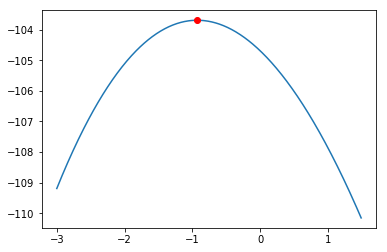

In [102]:
######plotting likelihood###########
x=np.loadtxt('llh_full.dat', usecols=0)
y=np.loadtxt('llh_full.dat', usecols=1)
plt.plot(x,y)
plt.plot(-0.93,-103.6954  , 'ro')
plt.show()

In [103]:
llh_full=-103.6954
llh1=np.loadtxt('llh_full.dat', usecols=1)

# q_u=np.log(temp)*(-2)
q_u=(llh1-llh_full)*(-2)

In [104]:
x_given=np.loadtxt('./jet.dat',usecols=0)
y_given=np.loadtxt('./jet.dat',usecols=1)

In [105]:
%store -r x1
%store -r q_u_noco
%store -r x_givenn
%store -r y_givenn

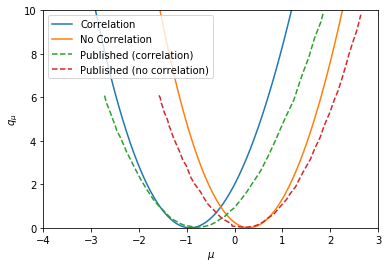

In [109]:
plt.plot(x,q_u)
plt.plot(x1,q_u_noco)
plt.plot(x_given,y_given,'--')
plt.plot(x_givenn,y_givenn,'--')

plt.legend(['Correlation','No Correlation','Published (correlation)','Published (no correlation)'])
plt.axis([-4,3,0,10])
plt.xlabel('$\mu$')
plt.ylabel('$q_{\mu}$')
# plt.title("correlation case")

plt.savefig('final.png', dpi=400)
plt.show()